In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [20]:
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='data',train = True, transform = transform, download = True)
test_dataset = datasets.MNIST(root='data',train= False, transform = transform)

def get_dataset():  
    """ Returns train and test datasets for MNIST
        Data is normalized using (0.1307,), (0.3081,)
    """
    
    return train_dataset, test_dataset
  
len(train_dataset)

60000

In [66]:


train_dataset_emnist = datasets.EMNIST(root="data/", split="byclass", download=True, train=True, 
                transform=tt.Compose([
                    lambda img: tt.functional.rotate(img, -90),
                    lambda img: tt.functional.hflip(img),
                    tt.ToTensor()
                ]))
test_dataset_emnist = datasets.EMNIST(root="data/", split="byclass", download=True, train=False, 
                transform=tt.Compose([
                    lambda img: tt.functional.rotate(img, -90),
                    lambda img: tt.functional.hflip(img),
                    tt.ToTensor()
                ]))

def get_dataset_emnist():  
    """ Returns train and test datasets for MNIST
        Data is normalized using (0.1307,), (0.3081,)
    """
    
    return train_dataset_emnist, test_dataset_emnist
  


In [67]:
print('Size of training set: ', len(train_dataset_emnist))
print('Size of test set: ', len(test_dataset_emnist))
print('Type of data stored: ',type(train_dataset_emnist[0]))

letters = train_dataset_emnist.classes
letters.sort()
print("No of classes: ",len(letters))
print("List of all classes")
print(letters)


Size of training set:  697932
Size of test set:  116323
Type of data stored:  <class 'tuple'>
No of classes:  62
List of all classes
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [68]:
def to_char(num):
    if num<10:
        return str(num)
    elif num < 36:
        return chr(num+55)
    else:
        return chr(num+61)

In [69]:
def show_example(data):
    img, label = data
    print("Label: ("+to_char(label)+")")
    plt.imshow(img[0], cmap="gray")

Label: (Z)


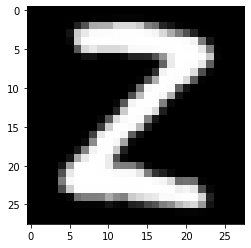

In [70]:
show_example(train_dataset_emnist[0])
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


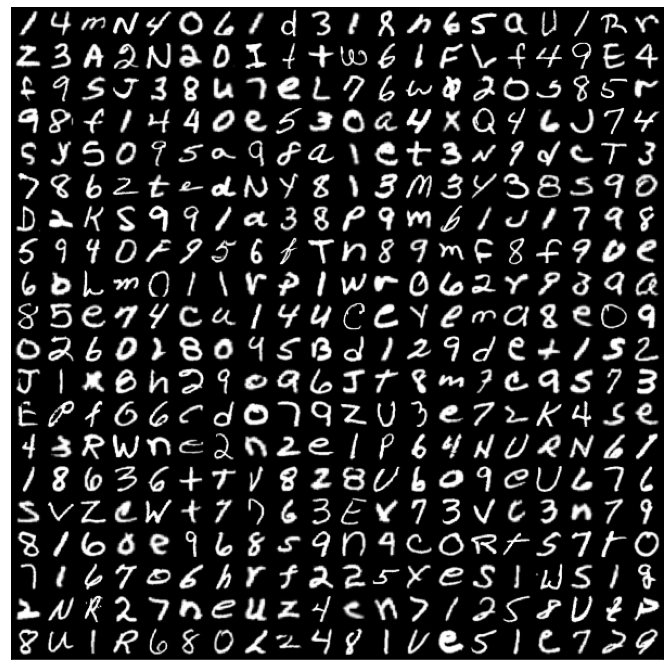

In [83]:
batch_size = 400

train_dl = DataLoader(train_dataset_emnist, batch_size, shuffle=True, num_workers=4, pin_memory=True)
# Lets see a batch of images

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
        break
        
show_batch(train_dl)